In [1]:
using Revise, Sqra, Plots

In [2]:
sim, dis, com, err = Sqra.with_perma(true, true) do
	#Sqra.batch(Simulation(nsteps=10_000_000), seeds=1:1, levels=vcat(3:10, 20))

	Sqra.batch(Simulation(nsteps=100_000_000), seeds=1:1, levels=vcat(3:20, 30, 40))
end;

┌ Info: reading cache/batch_9644177039278912568.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:38
┌ Warning: the following fields are present in type SparseBoxes saved in the file but not present in the type the workspace:
│ 
│ points,
│ 
│ Data in these fields will not be accessible
└ @ JLD2 /home/htc/bzfsikor/.julia/packages/JLD2/VHRWL/src/data/reconstructing_datatypes.jl:190


In [29]:
dis[1].prune

Inf

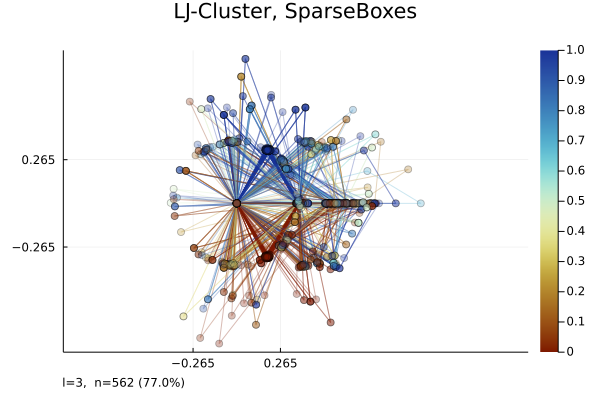

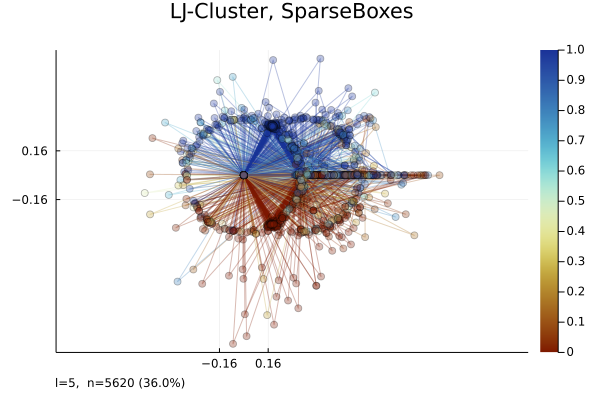

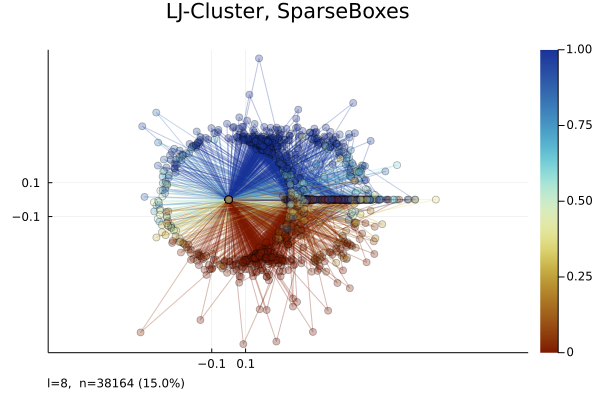

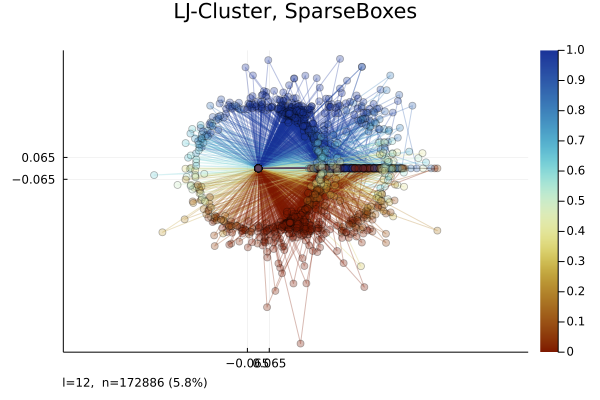

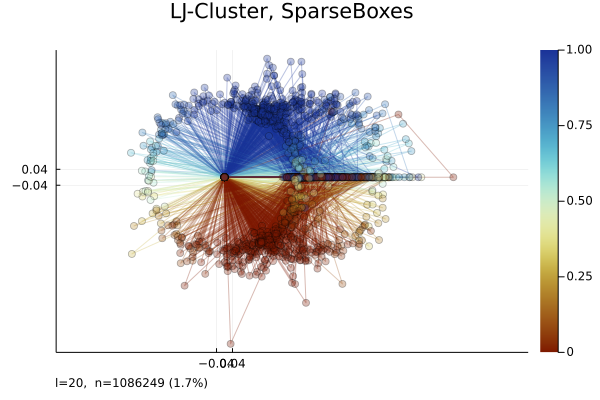

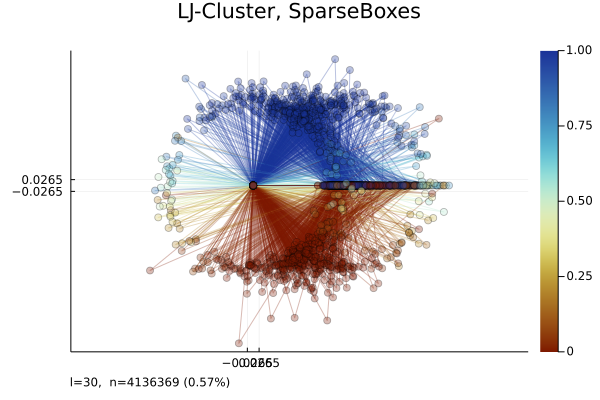

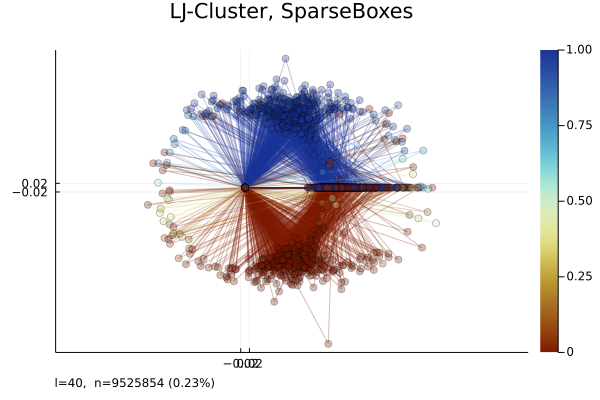

In [24]:
plotinds = [1,3,6,10, 18,19,20]
#plotinds = [1]
for i in plotinds 
	plot(dis[i], select=rand(1:size(dis[i].picks,2),1000), com=com[i],normalize=true) |> display
end

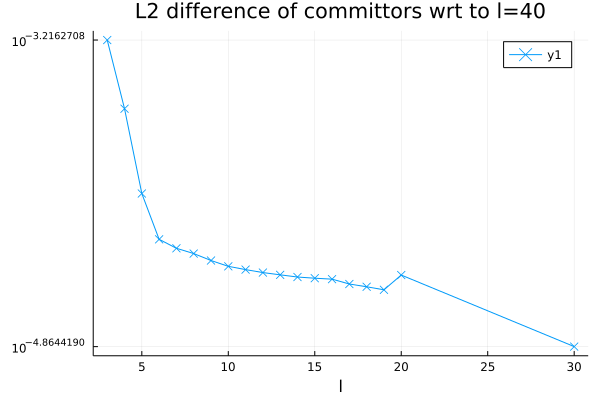

In [26]:
plot([d.ncells for d in dis[1:end-1]], err[1:end-1], marker=:x)
yaxis!(:log)
yticks!(Float64.(err[[1, end-1]]))
title!("L2 difference of committors wrt to l=$(dis[end].ncells)")
xlabel!("l")